In [2]:
from IPython import display
import os
import subprocess
from rdkit import Chem
from rdkit import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdShapeHelpers
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PyMol
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import copy
import pprint

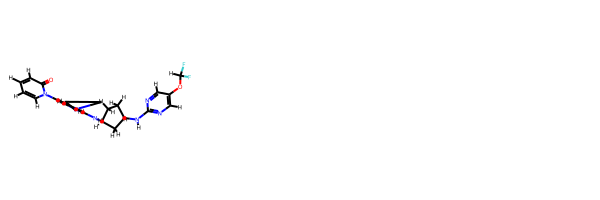

In [3]:
#载入数据
#绘制分子结构
mols = Chem.SDMolSupplier('azd0780.sdf', removeHs=False)
cdk2mol = [m for m in mols]
for m in cdk2mol:
    AllChem.EmbedMolecule(m, AllChem.ETKDGv2())
Draw.MolsToGridImage(cdk2mol)

In [3]:
cdk2mol2 = copy.deepcopy(cdk2mol)
 
crippen_contribs = [rdMolDescriptors._CalcCrippenContribs(mol) for mol in cdk2mol2]
 
ref = cdk2mol2[0]
ref_contrib = crippen_contribs[0]
targets = cdk2mol2[1:]
targets_contrib = crippen_contribs[1:]
 
for i, target in enumerate(targets):
    crippenO3A = rdMolAlign.GetCrippenO3A(target, ref, targets_contrib[i], ref_contrib)
    crippenO3A.Align()

In [4]:
w = Chem.SDWriter('align.sdf')
w.write(ref)
for mol in targets:
    w.write(mol)
w.close()

In [5]:
#调用药效团特征显示函数
showfeatpath = os.path.join(RDConfig.RDCodeDir, 'Chem/Features/ShowFeats.py') # 更正 showfeatpath
# 指定环境路径运行 ShowFeats.py
process = subprocess.Popen(['/root/miniforge3/envs/openfe_env/bin/python', showfeatpath, '--writeFeats','before_align_cdk2.sdf'], stdout=subprocess.PIPE)
stdout, stderr = process.communicate() # 等待子进程完成并获取输出

[14:11:04] ERROR: Unable to connect to PyMol server.
Please run ~landrgr1/extern/PyMol/launch.sh to start it.



In [6]:
process = subprocess.Popen(['python', showfeatpath, '--writeFeats','before_align_cdk2.sdf'], stdout=subprocess.PIPE)
stdout, stderr = process.communicate() # 等待子进程完成并获取输出

Traceback (most recent call last):
  File "/root/miniforge3/envs/openfe_env/lib/python3.9/site-packages/rdkit/Chem/Features/ShowFeats.py", line 20, in <module>
    from rdkit import RDLogger as logging
ModuleNotFoundError: No module named 'rdkit'


In [7]:
# Before align
#v = PyMol.MolViewer()
#v.DeleteAll()
process = subprocess.Popen(['python', showfeatpath, '--writeFeats','before_align_cdk2.sdf'], stdout=subprocess.PIPE)
stdout = process.communicate()[0]
png=v.GetPNG()
display.display(png)

Traceback (most recent call last):
  File "/root/miniforge3/envs/openfe_env/lib/python3.9/site-packages/rdkit/Chem/Features/ShowFeats.py", line 20, in <module>
    from rdkit import RDLogger as logging
ModuleNotFoundError: No module named 'rdkit'


NameError: name 'v' is not defined

In [ ]:
res = stdout.decode('utf-8').replace('\t', ' ').split('\n')
pprint.pprint(res)

In [9]:
from IPython import display
import os
import subprocess
from rdkit import Chem
from rdkit import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdShapeHelpers
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import copy
import pprint
import sys

#载入数据
#绘制分子结构
mols = Chem.SDMolSupplier('tyk2_ligands.sdf', removeHs=False)
cdk2mol = [m for m in mols]
for m in cdk2mol:
    AllChem.EmbedMolecule(m, AllChem.ETKDGv2())
Draw.MolsToGridImage(cdk2mol)

cdk2mol2 = copy.deepcopy(cdk2mol)
 
crippen_contribs = [rdMolDescriptors._CalcCrippenContribs(mol) for mol in cdk2mol2]
 
ref = cdk2mol2[0]
ref_contrib = crippen_contribs[0]
targets = cdk2mol2[1:]
targets_contrib = crippen_contribs[1:]
 
for i, target in enumerate(targets):
    crippenO3A = rdMolAlign.GetCrippenO3A(target, ref, targets_contrib[i], ref_contrib)
    crippenO3A.Align()


w = Chem.SDWriter('align.sdf')
w.write(ref)
for mol in targets:
    w.write(mol)
w.close()


#调用药效团特征显示函数
showfeatpath = os.path.join(RDConfig.RDCodeDir, 'Chem/Features/ShowFeats.py')


# 移除 PyMOL 相关代码
process = subprocess.Popen([sys.executable, showfeatpath, '--writeFeats','before_align_cdk2.sdf'], stdout=subprocess.PIPE)

stdout, stderr = process.communicate() # 等待子进程完成并获取输出

res = stdout.decode('utf-8').replace('\t', ' ').split('\n')
pprint.pprint(res)

['']


[14:23:51] ERROR: Unable to connect to PyMol server.
Please run ~landrgr1/extern/PyMol/launch.sh to start it.



In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdShapeHelpers
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import copy
import pprint
import os

# 载入数据
# 绘制分子结构
mols = Chem.SDMolSupplier('tyk2_ligands.sdf', removeHs=False)
cdk2mol = [m for m in mols]
for m in cdk2mol:
    AllChem.EmbedMolecule(m, AllChem.ETKDGv2())
Draw.MolsToGridImage(cdk2mol)

cdk2mol2 = copy.deepcopy(cdk2mol)

crippen_contribs = [rdMolDescriptors._CalcCrippenContribs(mol) for mol in cdk2mol2]

ref = cdk2mol2[0]
ref_contrib = crippen_contribs[0]
targets = cdk2mol2[1:]
targets_contrib = crippen_contribs[1:]

for i, target in enumerate(targets):
    crippenO3A = rdMolAlign.GetCrippenO3A(target, ref, targets_contrib[i], ref_contrib)
    crippenO3A.Align()

w = Chem.SDWriter('align.sdf')
w.write(ref)
for mol in targets:
    w.write(mol)
w.close()

# 加载特征定义文件
fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

# 打印表头
print("# Family     X     Y     Z     Radius  # Atom_ids")

# 提取并打印化学特征信息
for mol in cdk2mol2:
    feats = factory.GetFeaturesForMol(mol)
    for feat in feats:
        family = feat.GetFamily()
        pos = feat.GetPos()
        atom_ids = ' '.join([str(x + 1) for x in feat.GetAtomIds()])
        print(f"{family:10} {pos.x:6.3f} {pos.y:6.3f} {pos.z:6.3f}   1.0   # {atom_ids}")

# Family     X     Y     Z     Radius  # Atom_ids
Donor       0.751 -0.434  0.837   1.0   # 12
Donor      -3.852  0.515 -0.628   1.0   # 21
Acceptor    1.353 -1.019 -1.282   1.0   # 11
Acceptor   -3.225 -1.637  0.127   1.0   # 17
Acceptor   -4.460  1.145  1.482   1.0   # 24
Aromatic    4.510  0.102 -0.001   1.0   # 2 7 6 5 4 3
Aromatic   -1.924 -1.228  0.355   1.0   # 14 19 18 17 16 15
Hydrophobe  5.874  0.395  0.016   1.0   # 2
Hydrophobe  5.371 -0.429 -0.964   1.0   # 3
Hydrophobe  4.033 -0.698 -0.957   1.0   # 4
Hydrophobe  3.137 -0.185 -0.007   1.0   # 5
Hydrophobe  3.634  0.627  0.959   1.0   # 6
Hydrophobe  5.009  0.903  0.950   1.0   # 7
Hydrophobe -0.990 -2.119  0.845   1.0   # 15
Hydrophobe -1.552  0.055  0.100   1.0   # 19
Hydrophobe -5.715  2.219 -0.243   1.0   # 25
LumpedHydrophobe  4.510  0.102 -0.001   1.0   # 2 7 6 5 4 3
Donor       0.832 -0.870 -0.591   1.0   # 12
Donor      -3.761  0.808 -0.361   1.0   # 21
Acceptor    1.244 -0.093  1.498   1.0   # 11
Acceptor   -3.207

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdShapeHelpers
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import copy
import pprint
import os

# 载入数据
# 绘制分子结构
mols = Chem.SDMolSupplier('azd0780.sdf', removeHs=False)
cdk2mol = [m for m in mols]
for m in cdk2mol:
    AllChem.EmbedMolecule(m, AllChem.ETKDGv2())
Draw.MolsToGridImage(cdk2mol)

cdk2mol2 = copy.deepcopy(cdk2mol)

crippen_contribs = [rdMolDescriptors._CalcCrippenContribs(mol) for mol in cdk2mol2]

ref = cdk2mol2[0]
ref_contrib = crippen_contribs[0]
targets = cdk2mol2[1:]
targets_contrib = crippen_contribs[1:]

for i, target in enumerate(targets):
    crippenO3A = rdMolAlign.GetCrippenO3A(target, ref, targets_contrib[i], ref_contrib)
    crippenO3A.Align()

w = Chem.SDWriter('align.sdf')
w.write(ref)
for mol in targets:
    w.write(mol)
w.close()

# 加载特征定义文件
fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

# 提取并打印化学特征信息
for mol in cdk2mol2:
    feats = factory.GetFeaturesForMol(mol)
    print(f"Molecule: {mol.GetProp('_Name') if mol.HasProp('_Name') else 'Unnamed'}")
    print("# Family     X     Y     Z     Radius  # Atom_ids") # 为每个分子打印表头
    for feat in feats:
        family = feat.GetFamily()
        pos = feat.GetPos()
        atom_ids = ' '.join([str(x + 1) for x in feat.GetAtomIds()])
        print(f"{family:10} {pos.x:6.3f} {pos.y:6.3f} {pos.z:6.3f}   1.0   # {atom_ids}")
    print("-" * 50)  # 在每个分子信息之间添加分隔线

Molecule: azd0780
# Family     X     Y     Z     Radius  # Atom_ids
Donor       0.625 -1.727  0.085   1.0   # 10
Donor      -3.700 -1.827  0.830   1.0   # 14
Acceptor    4.741  2.692 -0.785   1.0   # 1
Acceptor   -6.028 -1.375  0.397   1.0   # 16
Acceptor   -4.492  0.122 -0.377   1.0   # 20
Acceptor   -7.805  1.254 -1.276   1.0   # 21
PosIonizable  2.444 -0.424  0.884   1.0   # 6
Aromatic    6.932  1.291 -0.683   1.0   # 2 30 29 28 27 3
Aromatic    3.140 -0.539 -0.263   1.0   # 4 9 8 7 6 5
Aromatic   -5.749 -0.241 -0.251   1.0   # 15 20 19 18 17 16
Hydrophobe  2.602 -1.262 -1.285   1.0   # 8
Hydrophobe  3.835 -0.662 -1.424   1.0   # 9
Hydrophobe -1.360 -2.359  1.321   1.0   # 12
Hydrophobe -2.023 -0.145  1.458   1.0   # 25
Hydrophobe -0.519 -0.085  1.373   1.0   # 26
Hydrophobe  8.072  0.527 -0.626   1.0   # 28
Hydrophobe  8.183  1.873 -0.817   1.0   # 29
Hydrophobe  7.044  2.641 -0.875   1.0   # 30
--------------------------------------------------


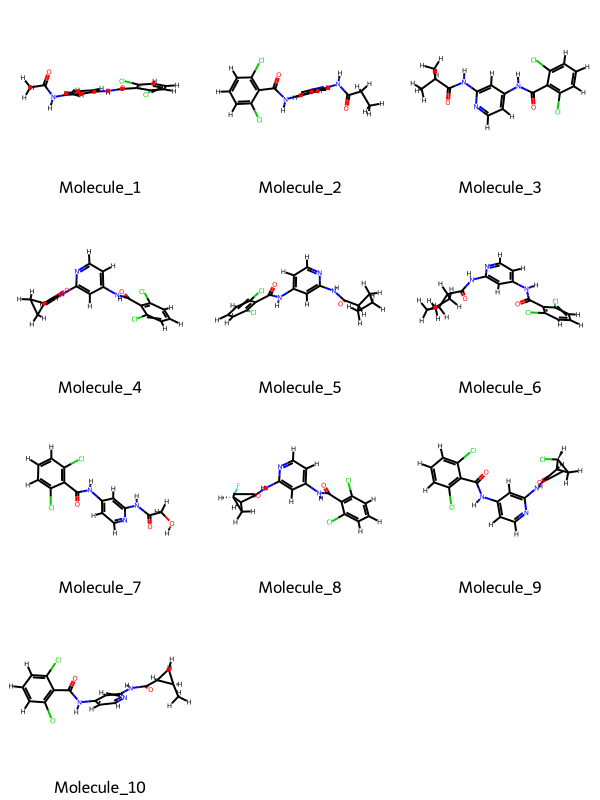

In [17]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# 载入数据
mols = Chem.SDMolSupplier('tyk2_ligands.sdf', removeHs=False)
cdk2mol = [m for m in mols]

# 为每个分子添加 ID 属性
for i, mol in enumerate(cdk2mol):
    mol.SetProp('_Name', f'Molecule_{i + 1}')
    AllChem.EmbedMolecule(mol, AllChem.ETKDGv2())

# 绘制分子结构，并在下方显示 ID
Draw.MolsToGridImage(cdk2mol, legends=[mol.GetProp('_Name') for mol in cdk2mol], molsPerRow=3, subImgSize=(200, 200))

In [26]:
import os
from rdkit import Chem, RDConfig, Geometry
from rdkit.Chem import ChemicalFeatures

def get_pharmacophore_coordinates(sdf_file):
    """
    从 SDF 文件中读取药效团特征的坐标。

    Args:
        sdf_file (str): SDF 文件路径。

    Returns:
        dict: 
            key: 特征类型 ('donors', 'acceptors', 'hydrophobics', 'aromatics').
            value: 匹配该特征类型的原子坐标列表，每个坐标是一个三元组 (x, y, z).
            如果SDF文件中没有找到匹配的特征，则该特征类型对应的值为[].
    """

    # 构建特征工厂
    fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
    factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

    # 定义特征类型与 Family 的映射
    type_dict = {
        'Donor': 'donors',
        'Acceptor': 'acceptors',
        'Hydrophobe': 'hydrophobics',
        'Aromatic': 'aromatics',
    }

    # 初始化结果字典
    coordinates = {
        'donors': [],
        'acceptors': [],
        'hydrophobics': [],
        'aromatics': [],
    }

    # 读取 SDF 文件
    mols = Chem.SDMolSupplier(sdf_file, removeHs=False)

    for mol in mols:
        print(f"Processing molecule: {mol.GetProp('_Name')}") # 打印分子名称

        # 提取化学特征
        feats = factory.GetFeaturesForMol(mol)

        for feat in feats:
            feat_family = feat.GetFamily()  # 获取特征 Family
            # 删除以下这行代码：
            # print(f"Feature Family: {feat_family}")  # 打印特征 Family
            feat_type = type_dict.get(feat_family)  # 获取对应的特征类型

            if feat_type:  # 如果找到了对应的特征类型
                atom_ids = feat.GetAtomIds()  # 获取字符串元组
                atom_ids = [int(i) for i in atom_ids] # 将字符串元组转换为整数列表
                for atom_id in atom_ids:
                    atom = mol.GetAtomWithIdx(atom_id)
                    #  直接获取原子坐标
                    x, y, z = mol.GetConformer().GetAtomPosition(atom_id) 
                    coordinates[feat_type].append((x, y, z))

    return coordinates


# 使用方法
sdf_file = "azd0780.sdf"  # 将 "tyk2_ligands.sdf" 替换成你的文件路径
cluster_centers_sel = get_pharmacophore_coordinates(sdf_file)

# 格式化输出结果
for feature_type, coords in cluster_centers_sel.items():
    print(f"Feature Type: {feature_type.upper()}")
    if coords:
        for i, coord in enumerate(coords):
            print(f"  Coordinate {i+1}: ({coord[0]:.3f}, {coord[1]:.3f}, {coord[2]:.3f})")
    else:
        print("  No coordinates found.")

Processing molecule: azd0780
Feature Type: DONORS
  Coordinate 1: (-25.374, 1.427, 12.743)
  Coordinate 2: (-26.919, 4.536, 9.337)
Feature Type: ACCEPTORS
  Coordinate 1: (-26.209, -4.198, 10.276)
  Coordinate 2: (-27.766, 5.982, 7.778)
  Coordinate 3: (-25.493, 6.159, 8.458)
  Coordinate 4: (-26.128, 8.765, 5.979)
Feature Type: HYDROPHOBICS
  Coordinate 1: (-27.319, -0.134, 12.834)
  Coordinate 2: (-27.781, -1.460, 12.701)
  Coordinate 3: (-26.320, 2.600, 10.770)
  Coordinate 4: (-25.746, 4.866, 11.489)
  Coordinate 5: (-25.275, 3.892, 12.565)
  Coordinate 6: (-28.719, -5.562, 13.185)
  Coordinate 7: (-28.333, -6.425, 12.095)
  Coordinate 8: (-27.491, -5.980, 11.141)
Feature Type: AROMATICS
  Coordinate 1: (-26.946, -4.618, 11.169)
  Coordinate 2: (-27.491, -5.980, 11.141)
  Coordinate 3: (-28.333, -6.425, 12.095)
  Coordinate 4: (-28.719, -5.562, 13.185)
  Coordinate 5: (-28.212, -4.320, 13.222)
  Coordinate 6: (-27.320, -3.843, 12.237)
  Coordinate 7: (-26.872, -2.492, 12.370)
  Coo

In [24]:
import os
from rdkit import Chem, RDConfig, Geometry
from rdkit.Chem import ChemicalFeatures
from collections import defaultdict

def get_pharmacophore_summary(sdf_file, selected_features=None, selected_molecule=None):
    """
    从 SDF 文件中提取药效团特征的坐标并汇总统计。

    Args:
        sdf_file (str): SDF 文件路径。
        selected_features (list, optional): 要显示的特征类型列表。默认为 None，显示所有特征类型。
        selected_molecule (str, optional): 要显示的分子名称。默认为 None，显示所有分子。

    Returns:
        dict: 
            key: 特征类型 ('donors', 'acceptors', 'hydrophobics', 'aromatics').
            value:  该特征类型的信息字典，包含 'count' (出现次数) 和 'avg_coords' (平均坐标).
    """

    # 构建特征工厂
    fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
    factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

    # 定义特征类型与 Family 的映射
    type_dict = {
        'Donor': 'donors',
        'Acceptor': 'acceptors',
        'Hydrophobe': 'hydrophobics',
        'Aromatic': 'aromatics',
    }

    # 初始化结果字典
    summary = defaultdict(lambda: {'count': 0, 'avg_coords': [0.0, 0.0, 0.0]})

    # 读取 SDF 文件
    mols = Chem.SDMolSupplier(sdf_file, removeHs=False)

    for mol in mols:
        mol_name = mol.GetProp('_Name')
        if selected_molecule and mol_name != selected_molecule:
            continue  # 跳过不需要的分子

        # 提取化学特征
        feats = factory.GetFeaturesForMol(mol)

        for feat in feats:
            feat_family = feat.GetFamily()
            feat_type = type_dict.get(feat_family)

            if feat_type and (not selected_features or feat_type in selected_features):
                atom_ids = feat.GetAtomIds()
                atom_ids = [int(i) for i in atom_ids]
                for atom_id in atom_ids:
                    x, y, z = mol.GetConformer().GetAtomPosition(atom_id)
                    summary[feat_type]['count'] += 1
                    summary[feat_type]['avg_coords'][0] += x
                    summary[feat_type]['avg_coords'][1] += y
                    summary[feat_type]['avg_coords'][2] += z

    # 计算平均坐标
    for feat_type, data in summary.items():
        if data['count'] > 0:
            data['avg_coords'] = [c / data['count'] for c in data['avg_coords']]

    return summary


# 使用方法 1：汇总统计所有特征类型
summary = get_pharmacophore_summary("azd0780.sdf")
for feature_type, data in summary.items():
    print(f"Feature Type: {feature_type.upper()}")
    print(f"  Count: {data['count']}")
    print(f"  Average Coordinates (Å): ({data['avg_coords'][0]:.2f}, {data['avg_coords'][1]:.2f}, {data['avg_coords'][2]:.2f})")


## 使用方法 2：筛选显示 'Donor' 和 'Acceptor' 的信息
#summary = get_pharmacophore_summary("tyk2_ligands.sdf", selected_features=['donors', 'acceptors'])
#for feature_type, data in summary.items():
#    print(f"Feature Type: {feature_type.upper()}")
#    print(f"  Count: {data['count']}")
#    print(f"  Average Coordinates (Å): ({data['avg_coords'][0]:.2f}, {data['avg_coords'][1]:.2f}, {data['avg_coords'][2]:.2f})")
#
#
## 使用方法 3：只显示 azd0780 分子的信息
#summary = get_pharmacophore_summary("tyk2_ligands.sdf", selected_molecule="azd0780")
#for feature_type, data in summary.items():
#    print(f"Feature Type: {feature_type.upper()}")
#    print(f"  Count: {data['count']}")
#    print(f"  Average Coordinates (Å): ({data['avg_coords'][0]:.2f}, {data['avg_coords'][1]:.2f}, {data['avg_coords'][2]:.2f})")

Feature Type: DONORS
  Count: 2
  Average Coordinates (Å): (-26.15, 2.98, 11.04)
Feature Type: ACCEPTORS
  Count: 4
  Average Coordinates (Å): (-26.40, 4.18, 8.12)
Feature Type: AROMATICS
  Count: 18
  Average Coordinates (Å): (-26.93, 0.11, 10.79)
Feature Type: HYDROPHOBICS
  Count: 8
  Average Coordinates (Å): (-27.12, -1.03, 12.10)


In [28]:
import os
from rdkit import Chem, RDConfig, Geometry
from rdkit.Chem import ChemicalFeatures

def get_atom_pharmacophore_features(mol, atom_idx):
    """
    获取特定原子的药效团特征和参数。

    Args:
        mol (rdkit.Chem.rdchem.Mol): RDKit 分子对象。
        atom_idx (int): 原子序号。

    Returns:
        list: 
            该原子所属的药效团特征列表。
            每个特征是一个字典，包含 'family', 'type', 'atom_ids' 和 'coordinates' 信息。
            如果原子不属于任何药效团特征，则返回空列表。
    """

    # 构建特征工厂
    fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
    factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

    # 定义特征类型与 Family 的映射
    type_dict = {
        'Donor': 'donors',
        'Acceptor': 'acceptors',
        'Hydrophobe': 'hydrophobics',
        'Aromatic': 'aromatics',
    }

    # 提取化学特征
    feats = factory.GetFeaturesForMol(mol)

    # 查找包含该原子的特征
    atom_features = []
    for feat in feats:
        atom_ids = [int(i) for i in feat.GetAtomIds()]
        if atom_idx in atom_ids:
            feat_family = feat.GetFamily()
            feat_type = type_dict.get(feat_family)
            coordinates = []
            for idx in atom_ids:
                x, y, z = mol.GetConformer().GetAtomPosition(idx)
                coordinates.append((x, y, z))
            atom_features.append({
                'family': feat_family,
                'type': feat_type,
                'atom_ids': atom_ids,
                'coordinates': coordinates,
            })

    return atom_features


# 使用方法
mol = Chem.MolFromMolFile("azd0780.sdf", removeHs=False) # 读取分子文件

# 指定原子序号列表
atom_indices = [1, 14, 30, 20, 16]

# 遍历原子序号列表并打印特征信息
for atom_idx in atom_indices:
    atom_features = get_atom_pharmacophore_features(mol, atom_idx)

    print(f"Atom {atom_idx} features:")
    if atom_features:
        for feature in atom_features:
            print(f"  Feature Family: {feature['family']}")
            print(f"  Feature Type: {feature['type']}")
            print(f"  Atom IDs: {feature['atom_ids']}")
            print(f"  Coordinates: {feature['coordinates']}")
    else:
        print(f"  Atom {atom_idx} does not belong to any pharmacophore feature.")
    print("-" * 30)

Atom 1 features:
  Feature Family: Aromatic
  Feature Type: aromatics
  Atom IDs: [1, 29, 28, 27, 26, 2]
  Coordinates: [(-26.9461, -4.6181, 11.1687), (-27.4911, -5.9799, 11.1414), (-28.3327, -6.4251, 12.0948), (-28.7188, -5.5625, 13.185), (-28.212, -4.32, 13.2219), (-27.3202, -3.8431, 12.2367)]
------------------------------
Atom 14 features:
  Feature Family: Aromatic
  Feature Type: aromatics
  Atom IDs: [14, 19, 18, 17, 16, 15]
  Coordinates: [(-26.7072, 5.6063, 8.4906), (-25.4932, 6.1588, 8.4582), (-25.3185, 7.2015, 7.62), (-26.3585, 7.6888, 6.8055), (-27.6007, 7.025, 6.9373), (-27.7659, 5.9823, 7.7777)]
------------------------------
Atom 30 features:
  Atom 30 does not belong to any pharmacophore feature.
------------------------------
Atom 20 features:
  Feature Family: Acceptor
  Feature Type: acceptors
  Atom IDs: [20]
  Coordinates: [(-26.1278, 8.7647, 5.9785)]
------------------------------
Atom 16 features:
  Feature Family: Aromatic
  Feature Type: aromatics
  Atom IDs: [

In [62]:
import os
from rdkit import Chem, RDConfig, Geometry
from rdkit.Chem import ChemicalFeatures

def get_pharmacophore_coordinates(sdf_file):
    """
    从 SDF 文件中读取药效团特征的坐标，并将其映射回分子的具体原子。

    Args:
        sdf_file (str): SDF 文件路径。

    Returns:
        dict: 
            key: 特征类型 ('donors', 'acceptors', 'hydrophobics', 'aromatics').
            value: 匹配该特征类型的原子信息列表，
                   每个元素是一个字典，包含 "atom_id", "element" 和 "coord" 键。
            如果SDF文件中没有找到匹配的特征，则该特征类型对应的值为[].
    """

    # 构建特征工厂
    fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
    factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

    # 定义特征类型与 Family 的映射
    type_dict = {
        'Donor': 'donors',
        'Acceptor': 'acceptors',
        'Hydrophobe': 'hydrophobics',
        'Aromatic': 'aromatics',
    }

    # 初始化结果字典
    coordinates = {
        'donors': [],
        'acceptors': [],
        'hydrophobics': [],
        'aromatics': [],
    }

    # 读取 SDF 文件
    mols = Chem.SDMolSupplier(sdf_file, removeHs=False)

    for mol in mols:
        print(f"Processing molecule: {mol.GetProp('_Name')}")  # 打印分子名称

        # 提取化学特征
        feats = factory.GetFeaturesForMol(mol)

        for feat in feats:
            feat_family = feat.GetFamily()  
            feat_type = type_dict.get(feat_family)  

            if feat_type:  
                atom_ids = feat.GetAtomIds()  # 获取字符串元组
                atom_ids = [int(i) for i in atom_ids]  # 将字符串元组转换为整数列表
                for atom_id in atom_ids:
                    atom = mol.GetAtomWithIdx(atom_id)
                    element = atom.GetSymbol()  # 获取原子元素符号
                    #  直接获取原子坐标
                    x, y, z = mol.GetConformer().GetAtomPosition(atom_id) 
                    coordinates[feat_type].append({
                        "atom_id": atom_id + 1,  # 将 RDKit 的 Atom ID 加 1
                        "element": element,  # 添加元素符号到坐标信息
                        "coord": (x, y, z),
                    })

    return coordinates

# 使用方法
sdf_file = "azd0780.sdf"  # 将 "tyk2_ligands.sdf" 替换成你的文件路径
cluster_centers_sel = get_pharmacophore_coordinates(sdf_file)

# 格式化输出结果
for feature_type, coords in cluster_centers_sel.items():
    print(f"Feature Type: {feature_type.upper()}")
    if coords:
        for i, data in enumerate(coords):
            print(f"  Coordinate {i+1}: Atom ID: {data['atom_id']} ({data['element']}), ({data['coord'][0]:.3f}, {data['coord'][1]:.3f}, {data['coord'][2]:.3f})")
    else:
        print("  No coordinates found.")

Processing molecule: azd0780
Feature Type: DONORS
  Coordinate 1: Atom ID: 10 (N), (-25.374, 1.427, 12.743)
  Coordinate 2: Atom ID: 14 (N), (-26.919, 4.536, 9.337)
Feature Type: ACCEPTORS
  Coordinate 1: Atom ID: 1 (O), (-26.209, -4.198, 10.276)
  Coordinate 2: Atom ID: 16 (N), (-27.766, 5.982, 7.778)
  Coordinate 3: Atom ID: 20 (N), (-25.493, 6.159, 8.458)
  Coordinate 4: Atom ID: 21 (O), (-26.128, 8.765, 5.979)
Feature Type: HYDROPHOBICS
  Coordinate 1: Atom ID: 8 (C), (-27.319, -0.134, 12.834)
  Coordinate 2: Atom ID: 9 (C), (-27.781, -1.460, 12.701)
  Coordinate 3: Atom ID: 12 (C), (-26.320, 2.600, 10.770)
  Coordinate 4: Atom ID: 25 (C), (-25.746, 4.866, 11.489)
  Coordinate 5: Atom ID: 26 (C), (-25.275, 3.892, 12.565)
  Coordinate 6: Atom ID: 28 (C), (-28.719, -5.562, 13.185)
  Coordinate 7: Atom ID: 29 (C), (-28.333, -6.425, 12.095)
  Coordinate 8: Atom ID: 30 (C), (-27.491, -5.980, 11.141)
Feature Type: AROMATICS
  Coordinate 1: Atom ID: 2 (C), (-26.946, -4.618, 11.169)
  Coor